# Modelagem e simulação

Roberto M. Cesar Jr. - IME - USP

rmcesar@usp.br

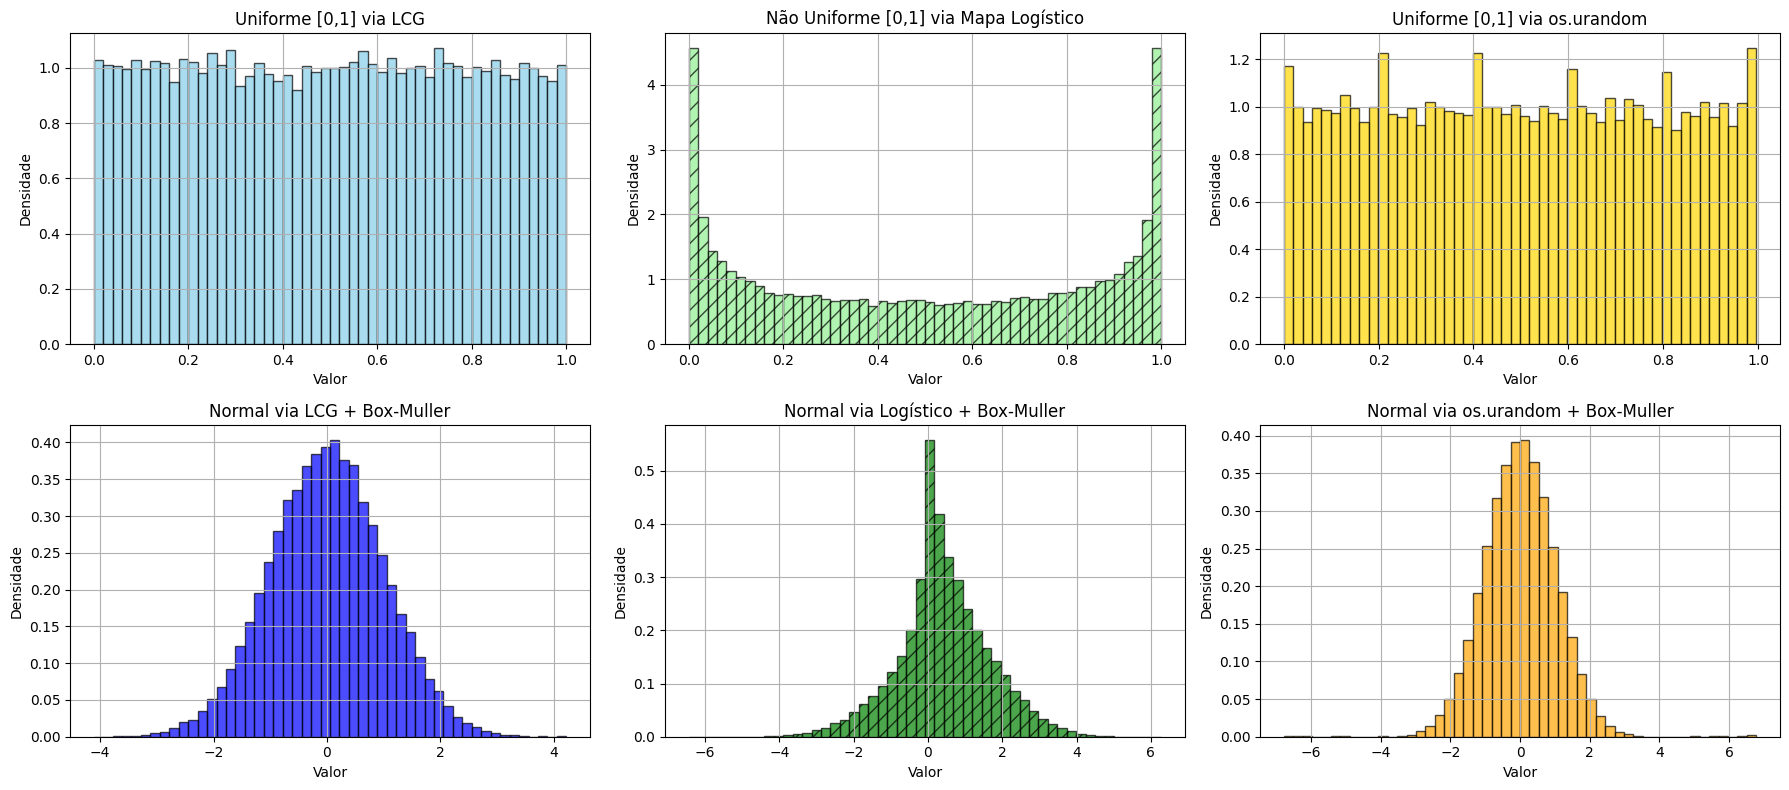

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

def lcg(seed, a, c, m, N):
    x = seed
    sequence = []
    for _ in range(N):
        x = (a * x + c) % m
        sequence.append(x / m)
    return sequence

def logistic_map(x0, r, N):
    x = x0
    seq = []
    for _ in range(N):
        x = r * x * (1 - x)
        seq.append(x)
    return seq

def urandom_uniform(N):
    return np.array([b / 256.0 for b in os.urandom(N)])

def box_muller(u, v):
    eps = 1e-10
    u = np.clip(u, eps, 1.0)  # evita log(0)
    return [np.sqrt(-2 * np.log(u[i])) * np.cos(2 * np.pi * v[i]) for i in range(len(u))]

def main():
    N = 50000

    # LCG
    u_lcg = lcg(12345, 1664525, 1013904223, 2**32, N)
    v_lcg = lcg(67890, 1664525, 1013904223, 2**32, N)
    z_lcg = box_muller(u_lcg, v_lcg)

    # Mapa logístico
    r = 4
    u_log = logistic_map(0.123456, r, N)
    v_log = logistic_map(0.654321, r, N)
    z_log = box_muller(u_log, v_log)

    # os.urandom
    u_urand = urandom_uniform(N)
    v_urand = urandom_uniform(N)
    z_urand = box_muller(u_urand, v_urand)

    plt.figure(figsize=(8, 5))
    plt.plot(bogo_ops, 'o-', label='Bogosort (tentativas)', color='red')
    plt.plot(smart_bogo_ops, 'o-', label='Smart(?) Bogosort (tentativas)', color='green')
    plt.plot(bubble_ops, 's-', label='Bubblesort (comparações)', color='blue')
    plt.yscale('log')
    plt.xlabel('Tamanho do vetor')
    plt.ylabel('Número de operações (log scale)')
    plt.title('Bogosort vs Bubblesort')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Plot
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))

    axes[0, 0].hist(u_lcg, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title("Uniforme [0,1] via LCG")

    axes[0, 1].hist(u_log, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black', hatch='//')
    axes[0, 1].set_title("Não Uniforme [0,1] via Mapa Logístico")

    axes[0, 2].hist(u_urand, bins=50, density=True, alpha=0.7, color='gold', edgecolor='black')
    axes[0, 2].set_title("Uniforme [0,1] via os.urandom")

    axes[1, 0].hist(z_lcg, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
    axes[1, 0].set_title("Normal via LCG + Box-Muller")

    axes[1, 1].hist(z_log, bins=50, density=True, alpha=0.7, color='green', edgecolor='black', hatch='//')
    axes[1, 1].set_title("Normal via Logístico + Box-Muller")

    axes[1, 2].hist(z_urand, bins=50, density=True, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 2].set_title("Normal via os.urandom + Box-Muller")

    for ax in axes.flat:
        ax.set_xlabel("Valor")
        ax.set_ylabel("Densidade")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

main()
